In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay

In [2]:
df = pd.read_csv('Used Car Dataset.csv')


In [3]:
df['ownsership'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', '2993 cc', '1461 cc',
       '998 cc', '1995 cc', '1451 cc', '1998 cc', '1498 cc', '1497 cc',
       '1996 cc', '1950 cc', '2013', 'Fifth Owner', '1199 cc', '1248 cc',
       '999 cc', '1197 cc', '1984 cc', '2999 cc', '1968 cc'], dtype=object)

In [4]:
df['ownsership']=df['ownsership'].str.replace(r'\b(?:\d+ cc|2013)\b(?!.*(First|Second|Third|Fifth) Owner)'
,'Preetham')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9700\3458698816.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ownsership']=df['ownsership'].str.replace(r'\b(?:\d+ cc|2013)\b(?!.*(First|Second|Third|Fifth) Owner)'


In [5]:
df['ownsership'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Preetham',
       'Fifth Owner'], dtype=object)

In [6]:
df = df[df['ownsership'] != 'Preetham']

In [7]:
df['ownsership'].value_counts()

First Owner     1240
Second Owner     240
Third Owner       21
Fifth Owner        2
Name: ownsership, dtype: int64

In [8]:
df['insurance_validity'].unique()

array(['Comprehensive', 'Third Party insurance', 'Zero Dep',
       'Third Party', 'Not Available'], dtype=object)

In [9]:
df['insurance_validity'].value_counts()

Comprehensive            1084
Third Party insurance     289
Zero Dep                   65
Third Party                63
Not Available               2
Name: insurance_validity, dtype: int64

In [10]:
df['insurance_validity']=df['insurance_validity'].str.replace('Petrol','Preetham-Vooturi')
df['insurance_validity']=df['insurance_validity'].str.replace('Third Party insurance','Third Party')

In [11]:
df = df[df['insurance_validity'] != 'Preetham-Vooturi']

In [12]:
df['insurance_validity'].unique()

array(['Comprehensive', 'Third Party', 'Zero Dep', 'Not Available'],
      dtype=object)

In [13]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [15]:
df['insurance_validity']=label_encoder.fit_transform(df['insurance_validity'])
df['fuel_type']=label_encoder.fit_transform(df['fuel_type'])
df['ownsership']=label_encoder.fit_transform(df['ownsership'])
df['transmission']=label_encoder.fit_transform(df['transmission'])

In [16]:
print(f"Insurance= {df['insurance_validity'].unique()}")
print(df['fuel_type'].unique())
print(df['ownsership'].unique())
print(df['transmission'].unique())

Insurance= [0 2 3 1]
[2 1 0]
[1 2 3 0]
[0 1]


In [17]:
from datetime import datetime
df['manufacturing_year'] = pd.to_numeric(df['manufacturing_year'])
current_year = datetime.now().year
df['Veichle_Age'] = current_year - df['manufacturing_year']

In [18]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
Veichle_Age           0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
X1=df[['insurance_validity','fuel_type','seats','kms_driven','ownsership','transmission','mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)','Veichle_Age']]
Y1=df['price(in lakhs)']

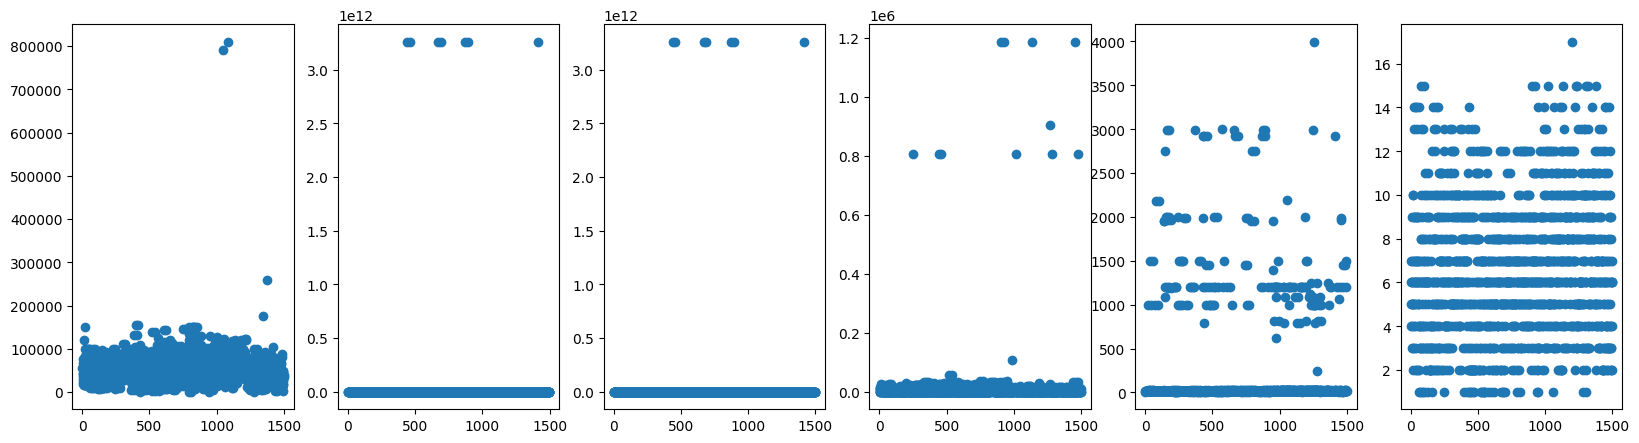

In [21]:
fig, axes = plt.subplots(1, 6, figsize = (20, 5))
x_axis = np.arange(1, X1.shape[0] + 1).reshape(-1, 1)

axes[0].scatter(x_axis, X1["kms_driven"])
axes[1].scatter(x_axis, X1["max_power(bhp)"])
axes[2].scatter(x_axis, X1["engine(cc)"])
axes[3].scatter(x_axis, X1["torque(Nm)"])
axes[4].scatter(x_axis, X1["mileage(kmpl)"])
axes[5].scatter(x_axis, X1["Veichle_Age"])

In [22]:
def remove_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df
df=remove_outliers(df,['insurance_validity','fuel_type','seats','kms_driven','ownsership','transmission','mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)','Veichle_Age'])

In [23]:
X=df[['insurance_validity','fuel_type','seats','kms_driven','ownsership','transmission','mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)','Veichle_Age']]
Y=df['price(in lakhs)']

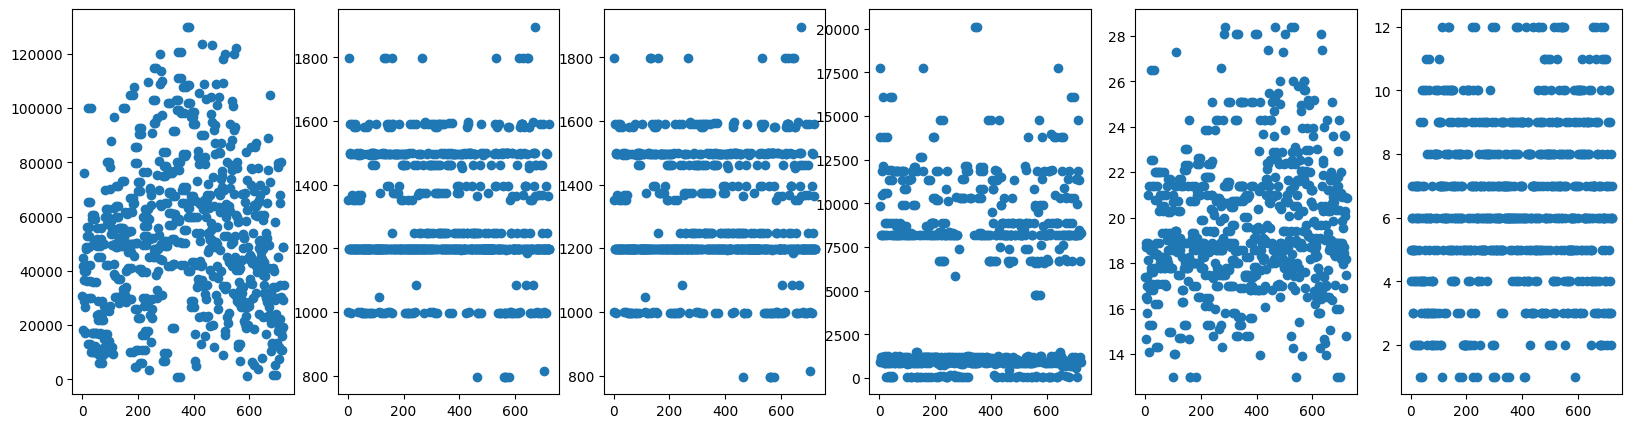

In [24]:
fig, axes = plt.subplots(1, 6, figsize = (20, 5))
x_axis = np.arange(1, X.shape[0] + 1).reshape(-1, 1)
axes[0].scatter(x_axis, X["kms_driven"])
axes[1].scatter(x_axis, X["max_power(bhp)"])
axes[2].scatter(x_axis, X["engine(cc)"])
axes[3].scatter(x_axis, X["torque(Nm)"])
axes[4].scatter(x_axis, X["mileage(kmpl)"])
axes[5].scatter(x_axis, X["Veichle_Age"])


In [25]:
X=df[['insurance_validity','fuel_type','seats','kms_driven','ownsership','transmission','mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)','Veichle_Age']]
Y=df['price(in lakhs)']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3) # splitted into train and val_and_test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) # splitted the val_and_test into validation nad test


In [27]:
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

In [29]:
# Create and compile the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='relu'),
    Dense(1,activation='linear')
])

In [30]:
custom_optimizer = Adam(learning_rate=0.001)  

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

In [58]:
# Train the model
hist = model.fit(X_train_scaled, Y_train,
                 batch_size=32, epochs=50,  
                 validation_data=(X_val_scaled, Y_val))

Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 1.8395 - val_loss: 2.7309
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 1.8555 - val_loss: 2.8817
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 1.8106 - val_loss: 2.8345
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 1.8170 - val_loss: 2.7086
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 1.8046 - val_loss: 2.5114
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 1.8304 - val_loss: 2.8846
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 1.8981 - val_loss: 2.8999
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 1.8113 - val_loss: 2.8129
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 1.8240 - val_loss: 2.6664
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 1.8215 - val_loss: 2.7846
Epoch 11/50
16/16 [

In [59]:
predict=model.predict(X_test_scaled)

4/4 [==============================] - 0s 5ms/step


In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predict,Y_test)


5.066541449432563

In [62]:
# Function to encode categorical variables, handling unseen labels
def encode_categorical(label_encoder, label, categories):
    try:
        encoded_label = label_encoder.transform([label])[0]
    except ValueError:
        # Handle previously unseen labels
        print(f"Unseen label '{label}' encountered. Encoding as a new category.")
        categories.append(label)
        encoded_label = len(categories) - 1  # Assign a new encoded value for the unseen label
    return encoded_label

# Function to get user input
def get_user_input():
    print("Please provide the following information about the car:")
    insurance_validity = input("Insurance Validity (Comprehensive/Third Party/Zero Dep/Not Available): ")
    fuel_type = input("Fuel Type (Petrol/Diesel/CNG): ")
    seats = int(input("Number of Seats: "))
    kms_driven = float(input("Kilometers Driven: "))
    ownership = input("Ownership (First Owner/Second Owner/Third Owner/Fifth Owner): ")
    transmission = input("Transmission Type (Automatic/Manual): ")
    mileage = float(input("Mileage (kmpl): "))
    engine_cc = float(input("Engine Displacement (cc): "))
    max_power_bhp = float(input("Maximum Power (bhp): "))
    torque_Nm = float(input("Torque (Nm): "))
    manufacturing_year = int(input("Manufacturing Year: "))
    
    # Calculating vehicle age
    current_year = 2024  # Assuming the current year is 2024
    vehicle_age = current_year - manufacturing_year
    
    # Encoding categorical variables
    encoded_categories = []
    insurance_validity_encoded = encode_categorical(label_encoder, insurance_validity, encoded_categories)
    fuel_type_encoded = encode_categorical(label_encoder, fuel_type, encoded_categories)
    ownership_encoded = encode_categorical(label_encoder, ownership, encoded_categories)
    transmission_encoded = encode_categorical(label_encoder, transmission, encoded_categories)
    
    # Scaling numerical features
    user_input = np.array([[insurance_validity_encoded, fuel_type_encoded, seats, kms_driven, 
                            ownership_encoded, transmission_encoded, mileage, engine_cc, 
                            max_power_bhp, torque_Nm, vehicle_age]])
    user_input_scaled = scaler_X.transform(user_input)
    
    return user_input_scaled

# Getting user input
user_input_scaled = get_user_input()

# Predicting car price
predicted_price = predict_car_price(user_input_scaled)

print(f"\nThe predicted price of the car is: {predicted_price} lakhs")


Please provide the following information about the car:
Insurance Validity (Comprehensive/Third Party/Zero Dep/Not Available): Third Party
Fuel Type (Petrol/Diesel/CNG): Petrol
Number of Seats: 4
Kilometers Driven: 5000
Ownership (First Owner/Second Owner/Third Owner/Fifth Owner): Second Owner
Transmission Type (Automatic/Manual): Automatic
Mileage (kmpl): 20
Engine Displacement (cc): 2041
Maximum Power (bhp): 1995
Torque (Nm): 230
Manufacturing Year: 2010
Unseen label 'Third Party' encountered. Encoding as a new category.
Unseen label 'Petrol' encountered. Encoding as a new category.
Unseen label 'Second Owner' encountered. Encoding as a new category.
1/1 [==============================] - 0s 31ms/step

The predicted price of the car is: 10.229806900024414 lakhs


C:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
